# 사이킷런을 이용한 k-NN 및 로지스틱 회귀 과제 - 유방암 자료 

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [2]:
wiscdata= pd.read_csv('C:/Python/wisc_bc_data.csv' , encoding='utf-8')

In [3]:
wiscdata.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,87139402,B,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,8910251,B,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,905520,B,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,868871,B,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,9012568,B,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


In [4]:
del wiscdata['id']

wisc= pd.DataFrame(wiscdata)
wisc

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,B,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,0.1959,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,B,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,0.1922,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,B,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,0.1714,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,B,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,0.1771,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,B,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,0.1721,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,B,13.17,18.22,84.28,537.3,0.07466,0.05994,0.04859,0.02870,0.1454,...,14.90,23.89,95.10,687.6,0.1282,0.1965,0.18760,0.10450,0.2235,0.06925
565,B,10.26,14.71,66.20,321.6,0.09882,0.09159,0.03581,0.02037,0.1633,...,10.88,19.48,70.89,357.1,0.1360,0.1636,0.07162,0.04074,0.2434,0.08488
566,M,15.28,22.41,98.92,710.6,0.09057,0.10520,0.05375,0.03263,0.1727,...,17.80,28.03,113.80,973.1,0.1301,0.3299,0.36300,0.12260,0.3175,0.09772
567,B,14.53,13.98,93.86,644.2,0.10990,0.09242,0.06895,0.06495,0.1650,...,15.80,16.93,103.10,749.9,0.1347,0.1478,0.13730,0.10690,0.2606,0.07810


In [5]:
X = np.array(wisc.iloc[:,1:])
y = np.array(wisc.diagnosis)
print('클래스 레이블:',np.unique(y))

클래스 레이블: ['B' 'M']


In [6]:
X_train, X_test, y_train, y_test =train_test_split(X,y,random_state=1,test_size=0.2)

In [7]:
%matplotlib inline

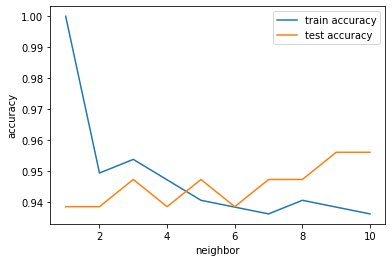

In [8]:
train_accuracy = []
test_accuracy = []
neighbor_range = range(1,11)

for neighbor in neighbor_range:
    clf = KNeighborsClassifier(n_neighbors = neighbor)
    clf.fit(X_train, y_train)
    train_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))
    
   
plt.plot(neighbor_range, train_accuracy, label="train accuracy")
plt.plot(neighbor_range, test_accuracy, label="test accuracy")
plt.ylabel("accuracy")
plt.xlabel("neighbor")
plt.legend()

In [26]:
from sklearn.utils import shuffle

In [10]:
%matplotlib inline
plt.figure()
train_accuracy = []
test_accuracy = []
n_neighbors=[]
knn=[]
from sklearn.metrics import accuracy_score,classification_report

for i in range(100):
    X, y = shuffle(X, y)
    X_train, X_test, y_train, y_test =train_test_split(X,y,random_state=1,test_size=0.2)
    clf = KNeighborsClassifier(n_neighbors = 5)
    clf.fit(X_train, y_train)
     
    knn.append(clf.score(X_test,y_test))
    
print(knn)

[0.956140350877193, 0.9122807017543859, 0.9210526315789473, 0.9035087719298246, 0.9298245614035088, 0.9385964912280702, 0.9649122807017544, 0.9473684210526315, 0.9122807017543859, 0.9385964912280702, 0.9122807017543859, 0.9122807017543859, 0.9473684210526315, 0.9473684210526315, 0.9210526315789473, 0.956140350877193, 0.9385964912280702, 0.9298245614035088, 0.9298245614035088, 0.9649122807017544, 0.9649122807017544, 0.9473684210526315, 0.9298245614035088, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.9736842105263158, 0.9298245614035088, 0.9385964912280702, 0.8947368421052632, 0.9298245614035088, 0.9122807017543859, 0.8947368421052632, 0.9298245614035088, 0.9473684210526315, 0.9298245614035088, 0.9210526315789473, 0.9385964912280702, 0.9298245614035088, 0.9473684210526315, 0.9122807017543859, 0.9385964912280702, 0.9035087719298246, 0.9385964912280702, 0.9298245614035088, 0.9473684210526315, 0.9298245614035088, 0.9298245614035088, 0.9824561403508771, 0.9649122807017544, 0

<Figure size 432x288 with 0 Axes>

(array([ 5.,  7., 13.,  8., 18., 21., 14.,  4.,  7.,  3.]),
 array([0.88596491, 0.89561404, 0.90526316, 0.91491228, 0.9245614 ,
        0.93421053, 0.94385965, 0.95350877, 0.96315789, 0.97280702,
        0.98245614]),
 <a list of 10 Patch objects>)

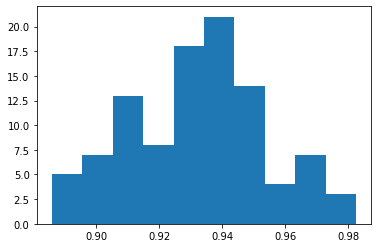

In [11]:
 plt.hist(knn)

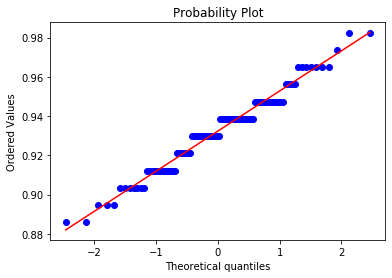

In [12]:
from scipy.stats import probplot
plt.figure()
probplot(knn,plot=plt)
plt.show()  

In [13]:
from scipy import stats
stats.shapiro(knn)  # 5% 검정 : 귀무가설 기각 

(0.9751247763633728, 0.05518389120697975)

In [14]:
pd.DataFrame(knn).describe()

,0
count,100.000000
mean,0.932368
std,0.020384
min,0.885965
25%,0.918860
50%,0.929825
75%,0.947368
max,0.982456


In [15]:
from sklearn.linear_model import LogisticRegression
logistic=[]
for i in range(100):
    X_train, X_test, y_train, y_test =train_test_split(X,y,random_state=i,test_size=0.2)
    
    X_combined=np.vstack((X_train, X_test))
    y_combined=np.hstack((y_train, y_test))
    
    lr = LogisticRegression(solver='liblinear',multi_class='auto', C=100.0, random_state=1)
    lr.fit(X_train, y_train)
    logistic.append(lr.score(X_test,y_test))

print(logistic)   

[0.956140350877193, 0.9649122807017544, 0.956140350877193, 0.9035087719298246, 0.9736842105263158, 0.9473684210526315, 0.9385964912280702, 1.0, 0.9210526315789473, 0.956140350877193, 0.9473684210526315, 0.9912280701754386, 0.9649122807017544, 0.956140350877193, 0.9473684210526315, 0.9649122807017544, 0.956140350877193, 0.956140350877193, 0.9473684210526315, 0.9824561403508771, 0.9649122807017544, 0.956140350877193, 0.9298245614035088, 0.9649122807017544, 0.956140350877193, 0.9385964912280702, 0.9824561403508771, 0.956140350877193, 0.9298245614035088, 0.9649122807017544, 0.9736842105263158, 0.9649122807017544, 0.9385964912280702, 0.9298245614035088, 0.9473684210526315, 0.9385964912280702, 0.9649122807017544, 0.956140350877193, 0.9736842105263158, 0.9824561403508771, 0.9035087719298246, 0.9824561403508771, 0.9385964912280702, 0.956140350877193, 0.9298245614035088, 0.9122807017543859, 0.9912280701754386, 0.9473684210526315, 0.9649122807017544, 0.956140350877193, 0.9912280701754386, 0.9736

(array([ 4.,  2.,  7., 11., 13., 23., 15., 10., 10.,  5.]),
 array([0.90350877, 0.91315789, 0.92280702, 0.93245614, 0.94210526,
        0.95175439, 0.96140351, 0.97105263, 0.98070175, 0.99035088,
        1.        ]),
 <a list of 10 Patch objects>)

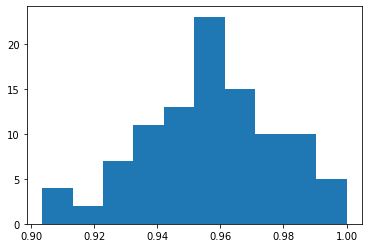

In [16]:
plt.hist(logistic)

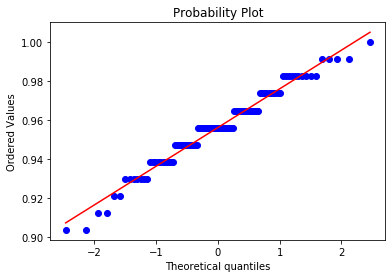

In [17]:
from scipy.stats import probplot
plt.figure()
probplot(logistic,plot=plt)
plt.show()

In [18]:
from scipy import stats
stats.shapiro(logistic) # 5% 검정 : 귀무가설 기각

(0.9723272323608398, 0.033403631299734116)

In [19]:
pd.DataFrame(logistic).describe()

,0
count,100.000000
mean,0.956140
std,0.019871
min,0.903509
25%,0.947368
50%,0.956140
75%,0.967105
max,1.000000


knn방법보다 logistic방법이 diagnosis를 추정할때 정확도가 더 높은 것으로 나타난다. 
히스토그램을 보면 logistic이 knn보다 좀 더 오른쪽으로 치우친 모습을 보이며 평균도 logistic이 더 높기 때문이다. (분산은  비슷함)
하지만 평균 0.95도 그다지 좋은 수치는 아니다.

# 사이킷런을 이용한 k-NN 및 로지스틱 회귀 과제 - 와인 자료

In [14]:
winedata= pd.read_csv('C:/Python/wine.csv' , encoding='utf-8')

In [15]:
winedata.head()

,Alcohol,Malic.Acid,Ash,Alcalinity.of.Ash,Magnesium,Total.Phenols,Flavanoids,Nonflavanoid.Phenols,Proanthocyanins,Color.Intensity,Hue,OD280.OD315.of.Diluted.Wines,Proline,Cultivar
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [16]:
wine=pd.DataFrame(winedata)
wine

,Alcohol,Malic.Acid,Ash,Alcalinity.of.Ash,Magnesium,Total.Phenols,Flavanoids,Nonflavanoid.Phenols,Proanthocyanins,Color.Intensity,Hue,OD280.OD315.of.Diluted.Wines,Proline,Cultivar
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,3
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,3
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,3
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,3


In [22]:
X = wine.iloc[:,0:13]
print(X.shape)
y = wine.Cultivar
print('클래스 레이블:',np.unique(y))

(178, 13)
클래스 레이블: [1 2 3]


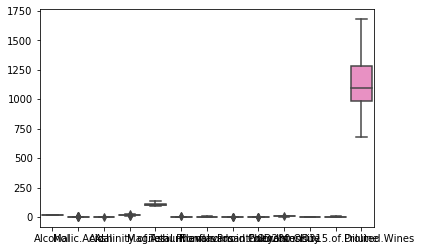

In [23]:
import seaborn as sns
## 표준화 이전의 상자그림 - 표준화 필요
winedata= pd.read_csv('C:/Python/wine.csv' , encoding='utf-8')
wine=pd.DataFrame(winedata)
result=wine[wine['Cultivar'] == 1]
X_= result.iloc[:,0:13]
y_ = result.Cultivar
sns.boxplot(data=X_)

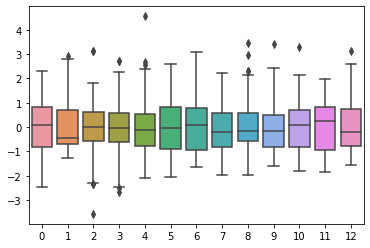

In [24]:
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test =train_test_split(X,y,random_state=1, test_size=0.2)
sc=StandardScaler()
sc.fit(X_train)
X_train_std=sc.transform(X_train)
X_test_std=sc.transform(X_test)

## 표준화 이후의 상자그림
result=X_train_std
sns.boxplot(data=X_train_std)



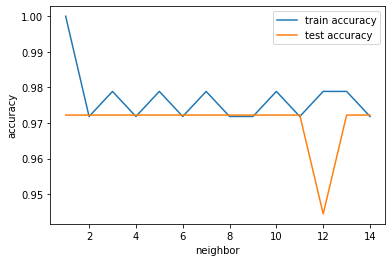

In [25]:

neighbor_range = range(1,15)
train_accuracy = []
test_accuracy = []

for neighbor in neighbor_range:
   
    clf = KNeighborsClassifier(n_neighbors = neighbor)
    clf.fit(X_train_std, y_train)
  
    train_accuracy.append(clf.score(X_train_std, y_train))
    test_accuracy.append(clf.score(X_test_std, y_test))
    
   
plt.plot(neighbor_range, train_accuracy, label="train accuracy")
plt.plot(neighbor_range, test_accuracy, label="test accuracy")
plt.ylabel("accuracy")
plt.xlabel("neighbor")
plt.legend()

In [27]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
train_accuracy = []
test_accuracy = []
n_neighbors=[]
knn=[]
from sklearn.metrics import accuracy_score,classification_report

for i in range(100):

    X, y = shuffle(X, y)
    X_train, X_test, y_train, y_test =train_test_split(X,y,random_state=1,test_size=0.2)
    sc=StandardScaler()
    sc.fit(X_train)
    X_train_std=sc.transform(X_train)
    X_test_std=sc.transform(X_test)
   
    clf = KNeighborsClassifier(n_neighbors = 9 )
    clf.fit(X_train_std, y_train)
     
    knn.append(clf.score(X_test_std,y_test))
    
    
    
print(knn)

[0.9722222222222222, 1.0, 0.9444444444444444, 1.0, 1.0, 0.9722222222222222, 0.9166666666666666, 1.0, 0.9722222222222222, 1.0, 0.9166666666666666, 0.9444444444444444, 0.9722222222222222, 0.9166666666666666, 1.0, 0.9722222222222222, 1.0, 0.9444444444444444, 1.0, 0.9722222222222222, 1.0, 0.9722222222222222, 0.9444444444444444, 0.9444444444444444, 1.0, 0.9444444444444444, 0.9722222222222222, 0.9444444444444444, 0.8888888888888888, 0.9444444444444444, 0.9444444444444444, 0.9722222222222222, 0.9166666666666666, 0.9722222222222222, 1.0, 0.9444444444444444, 0.9722222222222222, 0.9722222222222222, 0.9444444444444444, 1.0, 1.0, 0.9722222222222222, 0.9722222222222222, 0.9444444444444444, 0.9722222222222222, 1.0, 0.9722222222222222, 0.9722222222222222, 1.0, 1.0, 1.0, 0.9444444444444444, 0.9444444444444444, 1.0, 0.8888888888888888, 0.9722222222222222, 0.9444444444444444, 0.9722222222222222, 0.9722222222222222, 0.9166666666666666, 0.9722222222222222, 1.0, 0.9722222222222222, 0.9444444444444444, 0.94

In [28]:
pd.DataFrame(knn).describe()

,0
count,100.000000
mean,0.963889
std,0.032196
min,0.888889
25%,0.944444
50%,0.972222
75%,1.000000
max,1.000000


(array([ 6.,  0.,  9.,  0.,  0., 23.,  0., 33.,  0., 29.]),
 array([0.88888889, 0.9       , 0.91111111, 0.92222222, 0.93333333,
        0.94444444, 0.95555556, 0.96666667, 0.97777778, 0.98888889,
        1.        ]),
 <a list of 10 Patch objects>)

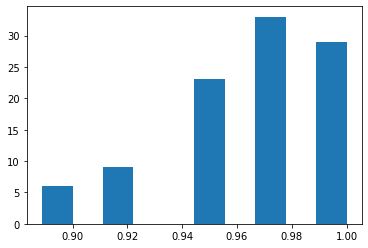

In [29]:
 plt.hist(knn)  

In [30]:
from sklearn.linear_model import LogisticRegression
logistic=[]
for i in range(100):
    X, y = shuffle(X, y)
    X_train, X_test, y_train, y_test =train_test_split(X,y,random_state=1,test_size=0.2)
    
    X_combined=np.vstack((X_train, X_test))
    y_combined=np.hstack((y_train, y_test))
    
    lr = LogisticRegression(solver='liblinear',multi_class='auto', C=100.0, random_state=1)
    lr.fit(X_train, y_train)
    logistic.append(lr.score(X_test,y_test))

print(logistic)

[0.9444444444444444, 1.0, 0.9166666666666666, 0.9166666666666666, 0.9166666666666666, 1.0, 1.0, 0.9722222222222222, 0.9444444444444444, 0.9444444444444444, 0.9722222222222222, 0.9722222222222222, 0.8888888888888888, 0.9444444444444444, 0.8888888888888888, 0.9444444444444444, 1.0, 0.9444444444444444, 0.9444444444444444, 0.9444444444444444, 0.9444444444444444, 0.9444444444444444, 0.8888888888888888, 0.9444444444444444, 0.9722222222222222, 1.0, 0.9444444444444444, 0.8888888888888888, 0.9444444444444444, 0.8888888888888888, 0.9722222222222222, 0.9444444444444444, 0.9722222222222222, 0.9722222222222222, 0.8611111111111112, 0.9444444444444444, 0.9722222222222222, 0.9444444444444444, 0.9722222222222222, 0.9166666666666666, 0.9722222222222222, 0.9166666666666666, 0.9444444444444444, 0.8888888888888888, 0.9444444444444444, 0.9444444444444444, 0.8888888888888888, 0.9722222222222222, 0.9166666666666666, 0.9444444444444444, 0.9444444444444444, 0.9166666666666666, 0.9722222222222222, 1.0, 0.9444444

In [31]:
pd.DataFrame(logistic).describe()

,0
count,100.000000
mean,0.943611
std,0.034522
min,0.861111
25%,0.916667
50%,0.944444
75%,0.972222
max,1.000000


(array([ 1.,  5.,  0., 21.,  0.,  0., 34.,  0., 24., 15.]),
 array([0.86111111, 0.875     , 0.88888889, 0.90277778, 0.91666667,
        0.93055556, 0.94444444, 0.95833333, 0.97222222, 0.98611111,
        1.        ]),
 <a list of 10 Patch objects>)

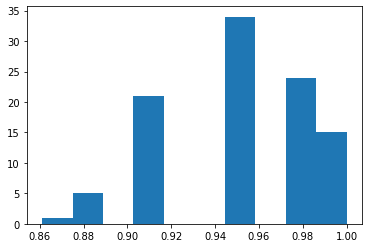

In [36]:
 plt.hist(logistic)

logistic방법보다 knn방법이 Cultivar을 추정할때 정확도가 더 높은 것으로 나타난다. 
히스토그램을 보면 knn이 logistic보다 좀 더 오른쪽으로 치우친 모습을 보이며 평균도 knn이 더 높기 때문이다. (분산은  비슷함)
하지만 knn의 평균 0.963도 그다지 좋은 수치는 아니다.
유방암자료와 비교해 봤을 때 와인 자료가 knn방법이 더 적절하다.